# DIAMOND PRICE PREDICTION

## Price of a diamond is determined using some characteristics

### # Carat - weight of diamond 0.100cts = 1carat = 200mg.
### # Clarity - inclusion and blemishes(scratches/air bubbles) in a diamond lesser scraches = higher quality = higher price
### # Color - color of diamond (D-E-F (High Quality), X-Y-Z (Poor Quality)) beyond Z color grade is considered as fancy color diamond.
### # Depth - depth of diamond from table - culet
### # Table - diameter of the table facet (top) 
### # x, y, z - dimensions of diamond

#

## TRAINING AND TESTING OF DATASET USING REGRESSION ALGORITHMS
### # Linear Regreesion Algorithm
### # Decision Tree Regressor Algorithm
### # Random Forest Regressor Algorithm
### # K-Nearest Neighbor Algorithm
### # SVR Algorithm
### # Adaboost Algorithm
### # Gradient Algorithm

In [1]:
import pandas as pd # importing necessary modules
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
# to ignore warning
import os 
import warnings

# Set environment variable
os.environ['OMP_NUM_THREADS'] = '1'

# Suppress Warnings
warnings.filterwarnings('ignore')

In [5]:
# loading data
diam = pd.read_csv("diamonds.csv")
diam

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
diam.cut.value_counts() # types of cut grade

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [13]:
diam_data.cut.value_counts() 
# CUT GRADE
# 0 - Fair          
# 1 - Good          
# 2 - Ideal
# 3 - Premium
# 4 - Very Good

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [15]:
diam.color.value_counts() # types of color grade

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [11]:
diam_data.color.value_counts()
# COLOR GRADE
# 0 - D
# 1 - E
# 2 - F
# 3 - G
# 4 - H
# 5 - I
# 6 - J

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [13]:
diam.clarity.value_counts() # count of clarity grade

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [15]:
diam_data.clarity.value_counts()  
# CLARITY GRADE
# 0 - I1 
# 1 - IF
# 2 - SI1  
# 3 - SI2 
# 4 - VS1 
# 5 - VS2
# 6 - VVS1 
# 7 - VVS2

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [9]:
# droping Unnamed: 0 column from the dataset 
diam_data = diam[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']]
diam_data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [17]:
diam_data.isnull().sum() # checking for null values

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## PLOTTING (CUT, COLOR, CLARITY) OF 4C'S DISTRIBUTION

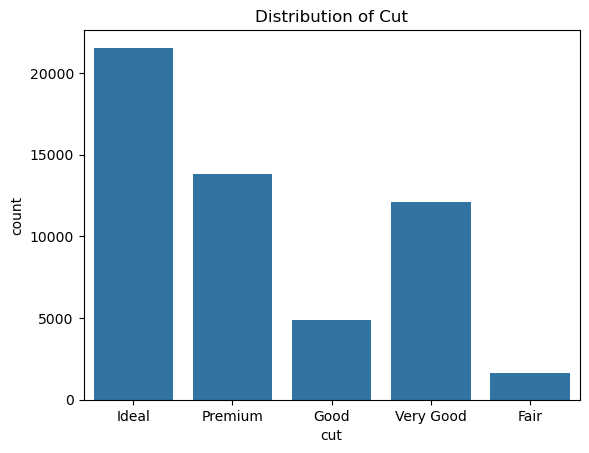

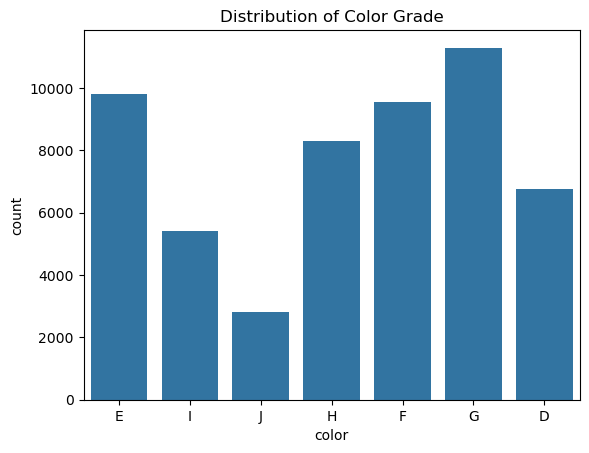

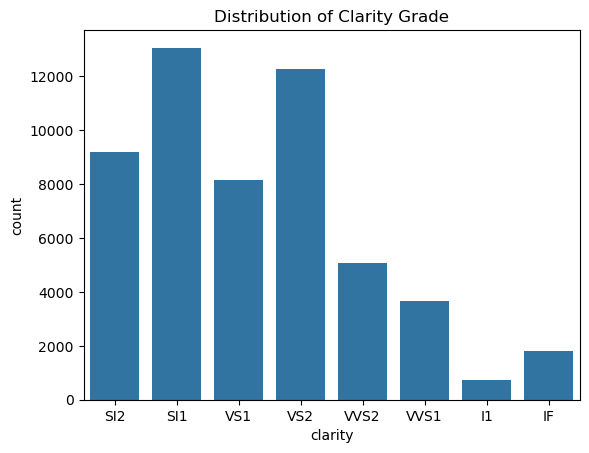

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of 'cut'
sns.countplot(x='cut', data=diam_data)
plt.title('Distribution of Cut')
plt.show()

# Plot distribution of 'color'
sns.countplot(x='color', data=diam_data)
plt.title('Distribution of Color Grade')
plt.show()

# Plot distribution of 'clarity'
sns.countplot(x='clarity', data=diam_data)
plt.title('Distribution of Clarity Grade')
plt.show()

In [22]:
# importing an module to convert text into numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # assigning Label Encoder module to an variable

In [24]:
# converting text into numeric 
diam_data['cut'] = le.fit_transform(diam_data['cut']) # cut
diam_data['color'] = le.fit_transform(diam_data['color']) # color
diam_data['clarity'] = le.fit_transform(diam_data['clarity']) # clarity

In [26]:
diam_data.head() # first 5

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [28]:
x = diam_data.drop(["price"], axis = 1) # features
x


,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [30]:
y = diam_data.price # targets
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

##

## SPLITING INTO TRAINING AND TESTING SETS

In [34]:
# importing train_test_split meethod to split dataset
from sklearn.model_selection import train_test_split 

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 42)
x_train

,carat,cut,color,clarity,depth,table,x,y,z
26546,2.01,1,2,3,58.1,64.0,8.23,8.19,4.77
9159,1.01,4,1,3,60.0,60.0,6.57,6.49,3.92
14131,1.10,3,4,5,62.5,58.0,6.59,6.54,4.10
15757,1.50,1,1,3,61.5,65.0,7.21,7.17,4.42
24632,1.52,4,3,4,62.1,57.0,7.27,7.32,4.53
...,...,...,...,...,...,...,...,...,...
11284,1.05,4,5,5,62.4,59.0,6.48,6.51,4.05
44732,0.47,2,0,4,61.0,55.0,5.03,5.01,3.06
38158,0.33,4,2,1,60.3,58.0,4.49,4.46,2.70
860,0.90,3,6,2,62.8,59.0,6.13,6.03,3.82


In [38]:
y_train

26546    16231
9159      4540
14131     5729
15757     6300
24632    12968
         ...  
11284     4975
44732     1617
38158     1014
860       2871
15795     6320
Name: price, Length: 43152, dtype: int64

##

In [41]:
# scales the features of your data set so that they are on the same scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)

##

## USING SEVERAL REGRESSION ALGORITHMS TO FIND THE BEST MODEL

## USING LINEAR REGRESSION

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Creating the Linear Regression model
lr_model = LinearRegression()

# Training the model
lr_model.fit(x_train_scaled, y_train)

# Predicting the test set results
y_pred = lr_model.predict(x_test_scaled)

# Calculating regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = lr_model.score(x_test_scaled, y_test)

# Printing the metrics
print("Accuracy of Linear Regression model :", accuracy)
print("Mean Squared Error (MSE) of Linear Regression model :", mse)
print("Mean Absolute Error (MAE) of Linear Regression model :", mae)
print("R^2 Score of Linear Regression model :", r2)


Accuracy of Linear Regression model : 0.8851397433679629
Mean Squared Error (MSE) of Linear Regression model : 1825912.9915253522
Mean Absolute Error (MAE) of Linear Regression model : 858.7084697710096
R^2 Score of Linear Regression model : 0.8851397433679629


## USING DECISION TREE REGRESSOR

In [52]:
# importing Decision Tree Regressor algorithm
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()

In [54]:
# Training the model
dtr_model.fit(x_train_scaled, y_train)

# Predicting the test set results
y_pred = dtr_model.predict(x_test_scaled)

# Calculating regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = dtr_model.score(x_test_scaled, y_test)

# Printing the metrics
print("Accuracy of Decision Tree Regressor model:", accuracy)
print("Mean Squared Error (MSE) of Decision Tree Regressor model:", mse)
print("Mean Absolute Error (MAE) of Decision Tree Regressor model:", mae)
print("R^2 Score of Decision Tree Regressor model:", r2)


Accuracy of Decision Tree Regressor model: 0.9671848353004658
Mean Squared Error (MSE) of Decision Tree Regressor model: 521656.8141221728
Mean Absolute Error (MAE) of Decision Tree Regressor model: 352.20267890248425
R^2 Score of Decision Tree Regressor model: 0.9671848353004658


## USING RANDOM FOREST REGRESSOR

In [47]:
# importing Random Forest Regressor algorithm
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators = 10)
# (n_estimators = 10): the random forest model will be composed of 10 decision trees.

In [49]:
# Training the model
rfr_model.fit(x_train_scaled, y_train)

# Predicting the test set results
y_pred = rfr_model.predict(x_test_scaled)

# Calculating regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = rfr_model.score(x_test_scaled, y_test)

# Printing the metrics
print("Accuracy Score of Random Forest Regressor model :", accuracy)
print("Mean Squared Error (MSE) of Random Forest Regressor model:", mse)
print("Mean Absolute Error (MAE) of Random Forest Regressor model:", mae)
print("R^2 Score of Random Forest Regressor model:", r2)


Accuracy Score of Random Forest Regressor model : 0.9796836520166002
Mean Squared Error (MSE) of Random Forest Regressor model: 322965.35643376503
Mean Absolute Error (MAE) of Random Forest Regressor model: 281.6877047689673
R^2 Score of Random Forest Regressor model: 0.9796836520166002


In [60]:
print("Accuracy Score of Random Forest Regressor model :", rfr_model.score(x_test_scaled,y_test)) # Accuracy score of trained model

Accuracy Score of Random Forest Regressor model : 0.9800457996924429


## USING K-NEAREST NEIGHBOR ALGORITHM

In [61]:
# importing KNeighbors Regressor algorithm
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors = 5)
# (n_neighbors = 5): the algorithm will look at the five closest data points to make its prediction

In [63]:
# Training the model
knn_model.fit(x_train_scaled, y_train)

# Predicting the test set results
y_pred = knn_model.predict(x_test_scaled)

# Calculating regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = knn_model.score(x_test_scaled, y_test)

# Printing the metrics
print("Accuracy Score of K Nearest Neighbor Regressor model :", accuracy)
print("Mean Squared Error (MSE) of K Nearest Neighbor Regressor model:", mse)
print("Mean Absolute Error (MAE) of K Nearest Neighbor Regressor model:", mae)
print("R^2 Score of K Nearest Neighbor Regressor model:", r2)


Accuracy Score of K Nearest Neighbor Regressor model : 0.9584376613985824
Mean Squared Error (MSE) of K Nearest Neighbor Regressor model: 660709.0758435299
Mean Absolute Error (MAE) of K Nearest Neighbor Regressor model: 408.7976826103078
R^2 Score of K Nearest Neighbor Regressor model: 0.9584376613985824


## USING ADABOOST OF BOOSTING ALGORITHMS

In [66]:
# importing AdaBoost Regressor algorithm
from sklearn.ensemble import AdaBoostRegressor
adaboost_model = AdaBoostRegressor(n_estimators = 20, learning_rate = 0.3)
#(n_estimators = 20): This parameter specifies the number of weak learners to be used in the boosting process
# higher number can increase the performance but also the computation time and risk of overfitting.

# (learning_rate = 0.3): This parameter controls the contribution of each weak learner to the final model
# (learning rate of 0.3): is used, which balances between the extremes of fast learning and potential overfitting

In [68]:
# Training the model
adaboost_model.fit(x_train_scaled, y_train)

# Predicting the test set results
y_pred = adaboost_model.predict(x_test_scaled)

# Calculating regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = adaboost_model.score(x_test_scaled, y_test)

# Printing the metrics
print("Accuracy Score of Ada Boost Regressor model :", accuracy)
print("Mean Squared Error (MSE) of Ada Boost Regressor model:", mse)
print("Mean Absolute Error (MAE) of Ada Boost Regressor model:", mae)
print("R^2 Score of Ada Boost Regressor model:", r2)


Accuracy Score of Ada Boost Regressor model : 0.8829682828427715
Mean Squared Error (MSE) of Ada Boost Regressor model: 1860432.3117827775
Mean Absolute Error (MAE) of Ada Boost Regressor model: 831.0977461543158
R^2 Score of Ada Boost Regressor model: 0.8829682828427715


## USING GRADIENT BOOST OF BOOSTING ALGORITHMS

In [71]:
# importing GradientBoostingRegressor algorithm
from sklearn.ensemble import GradientBoostingRegressor
gradientboost_model = GradientBoostingRegressor(n_estimators = 50, random_state = 42)
# (n_estimators = 50): the gradient boosting model will go through 50 iterations, 
# adding 50 weak learners to improve the model's predictions.

In [73]:
# Training the model
gradientboost_model.fit(x_train_scaled, y_train)

# Predicting the test set results
y_pred = gradientboost_model.predict(x_test_scaled)

# Calculating regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = gradientboost_model.score(x_test_scaled, y_test)

# Printing the metrics
print("Accuracy Score of Gradient Boosting Regressor model :", accuracy)
print("Mean Squared Error (MSE) of Gradient Boosting Regressor model:", mse)
print("Mean Absolute Error (MAE) of Gradient Boosting Regressor model:", mae)
print("R^2 Score of Gradient Boosting Regressor model:", r2)


Accuracy Score of Gradient Boosting Regressor model : 0.9616436016118523
Mean Squared Error (MSE) of Gradient Boosting Regressor model: 609744.8166897666
Mean Absolute Error (MAE) of Gradient Boosting Regressor model: 439.88303464424035
R^2 Score of Gradient Boosting Regressor model: 0.9616436016118523


## therefore the Best Model is RANDOM FOREST REGRESSOR ALGORITHM = 98 %

## SAVING THE RANDOM FOREST REGRESSOR ALGORITHM MODEL INTO PICKLE FILE

In [51]:
# used to import pickle tool and os module
import pickle 
import os 


model_file_name = "rfr_best_model.pkl" # name of the file where the Random Forest Regressor (RFR) model is saved
# using the .pkl extension which stands for "Pickle"


model_folder = "./models/" # the path to the folder where the model file is stored
# './' part indicates that the folder is in the current working directory
# "models/" is the name of the folder.

# Create the directory if doesn't exist
os.makedirs(model_folder, exist_ok = True)

# save the model using pickle
with open(os.path.join(model_folder,model_file_name), "wb") as file:
    pickle.dump(rfr_model, file)

In [53]:
# load the rfr model 
with open(os.path.join(model_folder, model_file_name), "rb") as file:
    load_rfr_model = pickle.load(file)

In [55]:
# used to import numpy library
import numpy as np
def make_prediction(carat, cut, color, clarity, depth, table, x, y, z):
    # load the pre-trained Random Forest Regressor : model
    with open(os.path.join(model_folder, model_file_name), "rb") as file:
        load_rfr_model = pickle.load(file)

    # prepare the input data
    input_data = np.array([[carat, cut, color, clarity, depth, table, x, y, z]])

    # Make prediction using loaded Random Forest Regressor model
    prediction = load_rfr_model.predict(input_data)

    # Format the prediction result
    final_info = "Estimate price : ${:d}".format(int(prediction[0]))

    return final_info

# user input
carat = float(input("Enter carat of diamond (weight) : ")) # carat/ weight of diamonds
cut = int(input("Enter Cut of diamond(FAIR = 0 , GOOD = 1, IDEAL = 2, PREMIUM = 3, VERY GOOD = 4) : ")) # cut of diamonds
color = int(input("Enter color of diamond (D = 0, J = 6) : ")) # color grade (D - High Quality, Z - Low Quality)
clarity = int(input("Enter clarity of diamond (0-7) : ")) # clarity grade (FL - High Quality, I3 - Low Quality) 
depth = float(input("Enter depth of diamond(mm) (Decimal value) : ")) # Depth of diamond from table to culet of diamond
table = int(input("Enter table diameter(mm) (whole number) : ")) # table diameter of diamond
x = float(input("Enter x dimension(mm) (Decimal value) : ")) # dimension of diamond
y = float(input("Enter y dimension(mm) (Decimal value): ")) # dimension of diamond
z = float(input("Enter z dimension(mm) (Decimal value): ")) # dimension of diamond

print(make_prediction(carat, cut, color, clarity, depth, table, x, y, z))

Enter carat of diamond (weight) :  2.00
Enter Cut of diamond(FAIR = 0 , GOOD = 1, IDEAL = 2, PREMIUM = 3, VERY GOOD = 4) :  0
Enter color of diamond (D = 0, J = 6) :  1
Enter clarity of diamond (0-7) :  1
Enter depth of diamond(mm) (Decimal value) :  2.25
Enter table diameter(mm) (whole number) :  55
Enter x dimension(mm) (Decimal value) :  3.25
Enter y dimension(mm) (Decimal value):  4.22
Enter z dimension(mm) (Decimal value):  5.21


Estimate price : $14965


## BUILD GRADIO APP - USER INTERFACE

In [57]:
# used to import the Gradio library
import gradio as gr

In [58]:
# title for the interface
headline = " DIAMOND PRICE FORECASTER" # displayed at the top of the Gradio interface

iface = gr.Interface(fn = make_prediction, # an instance of the Gradio Interface class
                     inputs = [
                         # creating a numeric input field, label used for labeling the user input
                         gr.Number(label = "Carat of diamond (weight)"),
                         gr.Number(label = "Cut (FAIR = 0 , GOOD = 1, IDEAL = 2, PREMIUM = 3, VERY GOOD = 4)"),
                         gr.Number(label = "Color Grade(D = 0, J = 6)"),
                         gr.Number(label = "Clarity Grade(0-7)"),
                         gr.Number(label = "Depth of Diamond(mm) (Decimal value)"),
                         gr.Number(label = "Table Diameter(mm) (Whole value))"),
                         gr.Number(label = "Dimension X (mm) (Decimal value)"),
                         gr.Number(label = "Dimension Y (mm) (Decimal value)"),
                         gr.Number(label = "Dimension Z (mm) (Decimal value)")],
                     outputs = gr.Textbox(label = "Predicted Price"), # used to display text output
                     title = headline) # title of the user interface

# "fn" parameter specifies the function to be called (make_prediction)
# inputs and outputs define the types and labels of the input and output components.
                         
iface.launch(share = True) # used to start the Gradio interface and make it accessible
# iface.launch(): This method launches the Gradio interface, making it available for interaction. 
# It starts a local server that hosts your interface.

# (share = True): This parameter allows you to generate a public, shareable link to your interface. 
# (share = False): If you don't need a shareable link and only want to use the interface locally.

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://fbf1585ab3e45b5163.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# in the above format generate code for regression supervised learning,
# by asking user input (carat, cut, color, clarity, depth, table, x, y, z)
# where ( carat, depth, table, x, y, z) are float datatype
# and (cut, color, clarity) are integer ranging from 1 to 5
# and predicting price as an integer using an randaom forest regressor model that is saved used in an pickle .
# generate def function code refering the table image given